# Model Training

### 1.1 Import Data and Required Packages
### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/1c/e1/78e635a1e5f0066bd02a1ecfd658ad09fe30d275c65c2d0dd76fe253e648/catboost-1.2.7-cp311-cp311-win_amd64.whl.metadata
  Using cached catboost-1.2.7-cp311-cp311-win_amd64.whl.metadata (1.2 kB)
  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   --------------------

   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- ---------------------- 43.8/101.7 MB 998.0 kB/s eta 0:00:59
   ---------------- --------------------

In [3]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/fe/df/e3a1f3f008db8d2b199ded2168014c7784b8027714b74d802c892815fd72/xgboost-2.1.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.1/124.9 MB 544.7 kB/s eta 0:03:50
   ---------------------------------------- 0.1/124.9 MB 472.1 kB/s eta 0:04:25
   ---------------------------------------- 0.2/124.9 MB 593.2 kB/s eta 0:03:31
   ---------------------------------------- 0.3/124.9 MB 824.9 kB/s eta 0:02:32
   -------------------------------------

   ----------------------- --------------- 76.1/124.9 MB 164.8 kB/s eta 0:04:57
   ----------------------- --------------- 76.1/124.9 MB 164.8 kB/s eta 0:04:57
   ----------------------- --------------- 76.1/124.9 MB 164.8 kB/s eta 0:04:57
   ----------------------- --------------- 76.1/124.9 MB 164.8 kB/s eta 0:04:57
   ----------------------- --------------- 76.1/124.9 MB 164.8 kB/s eta 0:04:57
   ----------------------- --------------- 76.1/124.9 MB 164.8 kB/s eta 0:04:57
   ----------------------- --------------- 76.1/124.9 MB 153.7 kB/s eta 0:05:18
   ----------------------- --------------- 76.1/124.9 MB 153.9 kB/s eta 0:05:17
   ----------------------- --------------- 76.1/124.9 MB 153.9 kB/s eta 0:05:17
   ----------------------- --------------- 76.1/124.9 MB 153.9 kB/s eta 0:05:17
   ----------------------- --------------- 76.1/124.9 MB 153.9 kB/s eta 0:05:17
   ----------------------- --------------- 76.1/124.9 MB 153.9 kB/s eta 0:05:17
   ----------------------- -------------

In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [6]:
data = pd.read_csv('data/stud.csv')

In [7]:
data.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

### Preparing X and Y variables

In [8]:
X = data.drop(columns=['math_score'])

In [9]:
X.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  reading_score  writing_score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75

In [10]:
y = data['math_score']

In [11]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [12]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [14]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [16]:
preprocessor = ColumnTransformer(
[
    ('OneHotEncorder', oh_transformer, cat_features),
    ('StandardScaler', numeric_transformer, num_features)
]
)

In [17]:
X= preprocessor.fit_transform(X)

In [18]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [20]:
X.shape

(1000, 19)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_squared = r2_score(true, predicted)
    return mae, mse, r2_squared

In [28]:
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Nearest Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoosting Regressor': CatBoostRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #Train model
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate train and test datasets
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for training set')
    print(f'-Root Mean Squared Error: {model_train_rmse:.4f}.')
    print(f'-Mean Absolute Error: {model_train_mae:.4f}.')
    print(f'-R2 Score: {model_train_r2:.4f}.')
    
    print('----------------------------------------------------------')
    
    print('Model performance for test set')
    print(f'-Root Mean Squared Error: {model_test_rmse:.4f}.')
    print(f'-Mean Absolute Error: {model_test_mae:.4f}.')
    print(f'-R2 Score: {model_test_r2:.4f}.')
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    
    

Linear Regression
Model performance for training set
-Root Mean Squared Error: 28.3349.
-Mean Absolute Error: 4.2667.
-R2 Score: 0.8743.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 29.0952.
-Mean Absolute Error: 4.2148.
-R2 Score: 0.8804.


Lasso
Model performance for training set
-Root Mean Squared Error: 43.4784.
-Mean Absolute Error: 5.2063.
-R2 Score: 0.8071.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 42.5064.
-Mean Absolute Error: 5.1579.
-R2 Score: 0.8253.


Ridge
Model performance for training set
-Root Mean Squared Error: 28.3378.
-Mean Absolute Error: 4.2650.
-R2 Score: 0.8743.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 29.0563.
-Mean Absolute Error: 4.2111.
-R2 Score: 0.8806.


K-Nearest Regressor
Model performance for training set
-Root Mean Squared Error: 32.5

123:	learn: 5.1395294	total: 78.2ms	remaining: 552ms
124:	learn: 5.1342760	total: 79.1ms	remaining: 554ms
125:	learn: 5.1285361	total: 79.9ms	remaining: 554ms
126:	learn: 5.1233004	total: 80.6ms	remaining: 554ms
127:	learn: 5.1162005	total: 81.3ms	remaining: 554ms
128:	learn: 5.1087287	total: 82ms	remaining: 554ms
129:	learn: 5.1040759	total: 82.7ms	remaining: 554ms
130:	learn: 5.1003176	total: 83.5ms	remaining: 554ms
131:	learn: 5.0958142	total: 84.2ms	remaining: 553ms
132:	learn: 5.0921469	total: 84.7ms	remaining: 552ms
133:	learn: 5.0852583	total: 85.5ms	remaining: 553ms
134:	learn: 5.0792194	total: 86.2ms	remaining: 552ms
135:	learn: 5.0764768	total: 86.9ms	remaining: 552ms
136:	learn: 5.0721339	total: 87.7ms	remaining: 553ms
137:	learn: 5.0670316	total: 88.4ms	remaining: 552ms
138:	learn: 5.0613583	total: 89.1ms	remaining: 552ms
139:	learn: 5.0567591	total: 89.9ms	remaining: 552ms
140:	learn: 5.0502540	total: 90.5ms	remaining: 551ms
141:	learn: 5.0483765	total: 91ms	remaining: 550

400:	learn: 4.1609506	total: 261ms	remaining: 390ms
401:	learn: 4.1585441	total: 262ms	remaining: 390ms
402:	learn: 4.1544488	total: 263ms	remaining: 390ms
403:	learn: 4.1519746	total: 264ms	remaining: 389ms
404:	learn: 4.1495627	total: 264ms	remaining: 388ms
405:	learn: 4.1493280	total: 265ms	remaining: 388ms
406:	learn: 4.1474449	total: 266ms	remaining: 387ms
407:	learn: 4.1472548	total: 267ms	remaining: 387ms
408:	learn: 4.1445892	total: 267ms	remaining: 386ms
409:	learn: 4.1416910	total: 268ms	remaining: 386ms
410:	learn: 4.1388935	total: 269ms	remaining: 385ms
411:	learn: 4.1369646	total: 270ms	remaining: 385ms
412:	learn: 4.1337735	total: 270ms	remaining: 384ms
413:	learn: 4.1313634	total: 271ms	remaining: 383ms
414:	learn: 4.1302286	total: 272ms	remaining: 383ms
415:	learn: 4.1288419	total: 272ms	remaining: 382ms
416:	learn: 4.1241349	total: 273ms	remaining: 382ms
417:	learn: 4.1194225	total: 274ms	remaining: 381ms
418:	learn: 4.1170382	total: 275ms	remaining: 381ms
419:	learn: 

687:	learn: 3.5534538	total: 449ms	remaining: 204ms
688:	learn: 3.5523010	total: 450ms	remaining: 203ms
689:	learn: 3.5512540	total: 451ms	remaining: 203ms
690:	learn: 3.5498077	total: 451ms	remaining: 202ms
691:	learn: 3.5479929	total: 452ms	remaining: 201ms
692:	learn: 3.5454386	total: 453ms	remaining: 201ms
693:	learn: 3.5433138	total: 453ms	remaining: 200ms
694:	learn: 3.5429629	total: 454ms	remaining: 199ms
695:	learn: 3.5398005	total: 455ms	remaining: 199ms
696:	learn: 3.5395319	total: 455ms	remaining: 198ms
697:	learn: 3.5363324	total: 456ms	remaining: 197ms
698:	learn: 3.5349933	total: 457ms	remaining: 197ms
699:	learn: 3.5316370	total: 457ms	remaining: 196ms
700:	learn: 3.5310403	total: 458ms	remaining: 195ms
701:	learn: 3.5299739	total: 458ms	remaining: 194ms
702:	learn: 3.5273252	total: 459ms	remaining: 194ms
703:	learn: 3.5272008	total: 459ms	remaining: 193ms
704:	learn: 3.5234599	total: 460ms	remaining: 192ms
705:	learn: 3.5227299	total: 461ms	remaining: 192ms
706:	learn: 

993:	learn: 3.0533317	total: 639ms	remaining: 3.86ms
994:	learn: 3.0508904	total: 640ms	remaining: 3.21ms
995:	learn: 3.0497262	total: 640ms	remaining: 2.57ms
996:	learn: 3.0472173	total: 641ms	remaining: 1.93ms
997:	learn: 3.0471555	total: 642ms	remaining: 1.29ms
998:	learn: 3.0443067	total: 643ms	remaining: 643us
999:	learn: 3.0426642	total: 643ms	remaining: 0us
CatBoosting Regressor
Model performance for training set
-Root Mean Squared Error: 9.2578.
-Mean Absolute Error: 2.4054.
-R2 Score: 0.9589.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 36.1037.
-Mean Absolute Error: 4.6125.
-R2 Score: 0.8516.


AdaBoost Regressor
Model performance for training set
-Root Mean Squared Error: 33.7541.
-Mean Absolute Error: 4.7371.
-R2 Score: 0.8503.
----------------------------------------------------------
Model performance for test set
-Root Mean Squared Error: 37.3024.
-Mean Absolute Error: 4.7535.
-R2 Score: 0.8467.




### Ranked Model Results

In [30]:
rank_models = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model_name', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

In [31]:
rank_models

Model_name  R2_score
2                    Ridge  0.880593
0        Linear Regression  0.880433
7    CatBoosting Regressor  0.851632
5  Random Forest Regressor  0.851232
8       AdaBoost Regressor  0.846706
6             XGBRegressor  0.827797
1                    Lasso  0.825320
3      K-Nearest Regressor  0.784030
4            Decision Tree  0.744327

### Linear Regression

In [32]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f'Accuracy of the model is {score:.4f}')

Accuracy of the model is 88.0433


### Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

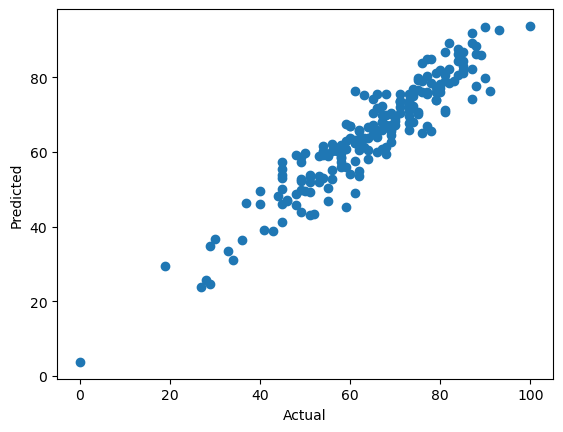

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

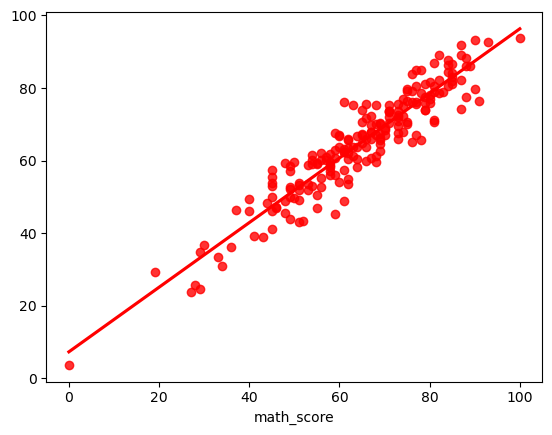

In [34]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

### Difference between Actual and Predicted Values

In [35]:
pred_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})

In [36]:
pred_df

Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378
..            ...              ...         ...
408            52        43.409149    8.590851
332            62        62.152214   -0.152214
208            74        67.888395    6.111605
613            65        67.022287   -2.022287
78             61        62.345132   -1.345132

[200 rows x 3 columns]